In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from pandas.tseries.offsets import DateOffset

import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.columns = ["",'Date',"","","",'Val',"",""]
df.head()

,,Date,,,,Val,,
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 8 columns):
        5632 non-null int64
Date    5632 non-null object
        3456 non-null object
        5632 non-null object
        5632 non-null object
Val     5632 non-null float64
        5632 non-null float64
        5632 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 352.1+ KB


           0
Date       0
        2176
           0
           0
Val        0
           0
           0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index ('Date', inplace = True)
df.index

DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-03-14', '2020-03-14', '2020-03-14', '2020-03-14',
               '2020-03-14', '2020-03-14', '2020-03-14', '2020-03-14',
               '2020-03-14', '2020-03-14'],
              dtype='datetime64[ns]', name='Date', length=5632, freq=None)

In [7]:
df_new = df['1998-01-01':]
df_new.tail()

,,,,,Val,,
Date,,,,,,,
2020-03-14,5628,"Virgin Islands, U.S.",US,2020-03-14T16:15:18,1.0,0.0,0.0
2020-03-14,5629,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
2020-03-14,5630,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
2020-03-14,5631,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
2020-03-14,5632,NaN,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0


In [8]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
,5632.0,2816.500000,1625.962689,1.0,1408.75,2816.5,4224.25,5632.0
Val,5632.0,582.415305,4935.578984,0.0,2.00,10.0,94.00,67790.0
,5632.0,18.335760,195.698066,0.0,0.00,0.0,1.00,3075.0
,5632.0,213.634766,2363.112194,0.0,0.00,0.0,12.00,52960.0


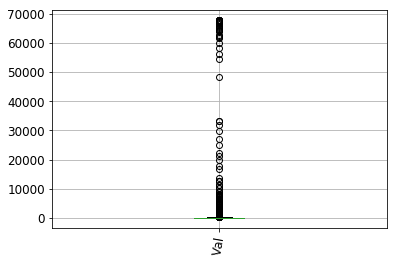

In [9]:
df_new.boxplot('Val', rot = 80, fontsize = '12',grid = True);

In [10]:
time_series = df_new['Val']
type(time_series)

pandas.core.series.Series

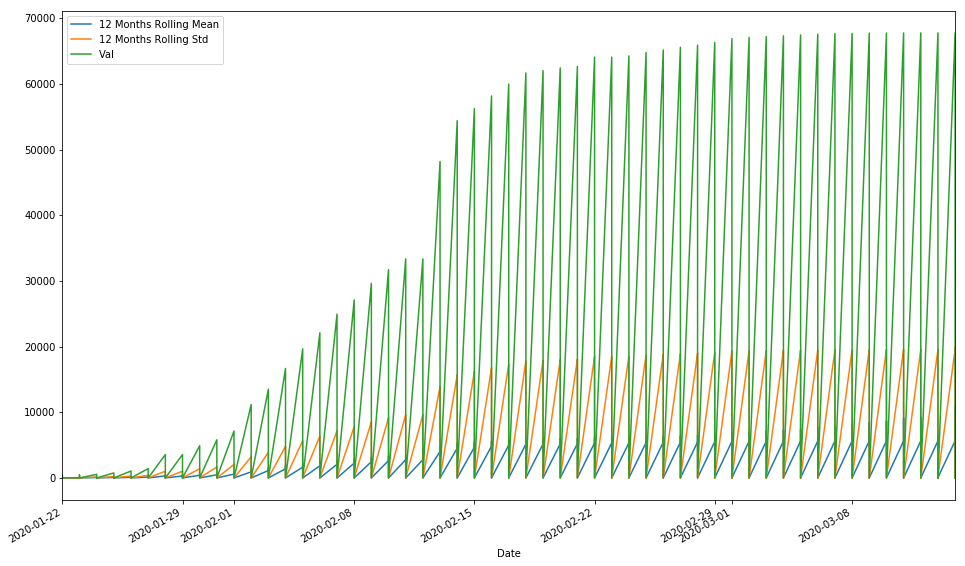

In [11]:
time_series.rolling(12).mean().plot(label = '12 Months Rolling Mean', figsize = (16,10))
time_series.rolling(12).std().plot(label = '12 Months Rolling Std')
time_series.plot()
plt.legend();